In [4]:
#!/usr/bin/python3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import os
from pathlib import Path
from matplotlib.pyplot import figure, draw
from matplotlib.ticker import AutoMinorLocator


#########################################################################
#   Configurações globais do grafico
plt.rcParams['axes.linewidth']=2
plt.rc('font', size=18)         # controls default text sizes
#########################################################################

#########################################################################
#   Configurações para salvar e plotar o grafico
BASE_PATH = os.getcwd()
PATH_SVG=BASE_PATH+"/../../../../inkscape/cap6/"
PATH_EPS=BASE_PATH+"/../../../../eps/cap6/"
fname = "runtime_optimization"
fname_svg = PATH_SVG+fname+".svg"
fname_eps = PATH_EPS+fname+".eps"
PLOT_FIG = True
SAVE_FIG = True
#########################################################################



#   Leitura do csv para pandas
##### Resultado para CentralDifferenceLinear Local Method - LUMPED
#df = pd.read_csv('./data/Crankshaft_17810_LUMPED_P1-P2-P4.csv', sep=";", skiprows=[0])
df = pd.read_csv('./runtime_optimize.csv', sep=";")
pd.set_option('expand_frame_repr', False, 'display.max_rows', 999, 'display.max_columns', 999)
df

OptimizationType  Runtime(s)  Speedup
0              -O3       63.92     1.00
1             BLAS       45.77     1.40
2            -qhot       33.42     1.91
3      Manual LICM       24.88     2.57
4           LAPACK       23.58     2.71
5      D1-Matrices       14.13     4.52

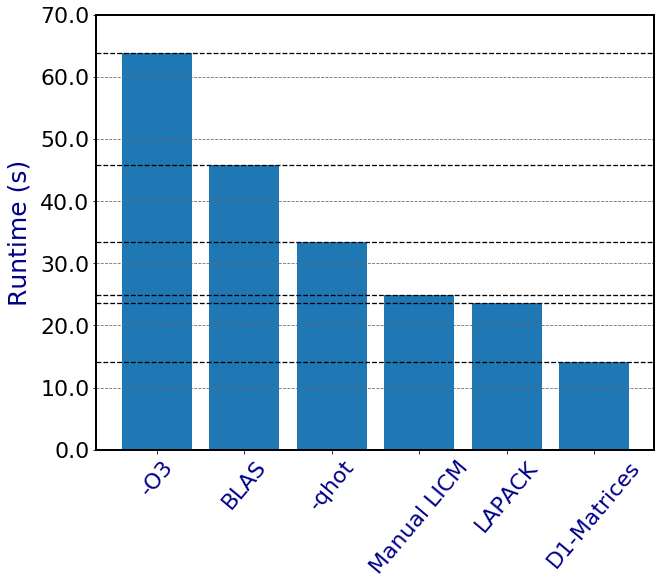

In [5]:
opt_type = df["OptimizationType"]
runtime = df["Runtime(s)"]
 
# Make fake dataset
fig, ax = plt.subplots(figsize=(10, 8)) # set the size that you'd like (width, height)

font = {#'family': 'serif',
        'color':  'darkblue',
        #'weight': 'normal',
        #'size': 16,
        }
 
# Choose the position of each barplots on the x-axis (space=1,4,3,1)
y_pos = [0, 5, 10, 17, 22, 30]
 
# Create bars
plt.bar(opt_type, runtime)
plt.yticks([0.0, 10.0, 20.0, 30.0, 40.0, 50.0, 60.0, 70.0], [0.0, 10.0, 20.0, 30.0, 40.0, 50.0, 60.0, 70.0], fontsize=22)
plt.xticks(fontsize=22, rotation=50, color='darkblue')
# minor_locator=AutoMinorLocator(1.001)
# plt.gca().yaxis.set_minor_locator(minor_locator)
# plt.grid(which='minor')

lines = runtime
for i in lines:
    plt.axhline(i, linestyle='--', color='black', linewidth='1.3')
lines = [0.0, 10.0, 20.0, 30.0, 40.0, 50.0, 60.0, 70.0]
for i in lines:
    plt.axhline(i, linestyle='--', color='dimgrey', linewidth='0.8') 
 
# Create names on the x-axis
# plt.xticks(y_pos, opt_type)

# plt.xlabel('Number Threads', fontsize=25)
plt.ylabel('Runtime (s)', fontsize=25, labelpad=9, fontdict=font)
color='tab:blue'
# plt.legend(loc=(0.05, .72), frameon = True)
# plt.legend(labels=["     65,442 Dofs", "   474,670 Dofs", "3,606,690 Dofs"], fontsize=22)
# plt.grid()
 
# Show graphic
plt.show()

In [6]:
#   Salva a figura
if (SAVE_FIG):
    fn = Path(fname_svg).expanduser()
    draw() # necessary to render figure before saving
    fig.savefig(fn, bbox_inches='tight')

    fn = Path(fname_eps).expanduser()
    draw() # necessary to render figure before saving
    fig.savefig(fn, bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

SyntaxError: can't use starred expression here (<ipython-input-11-a882e3bd1c0b>, line 26)

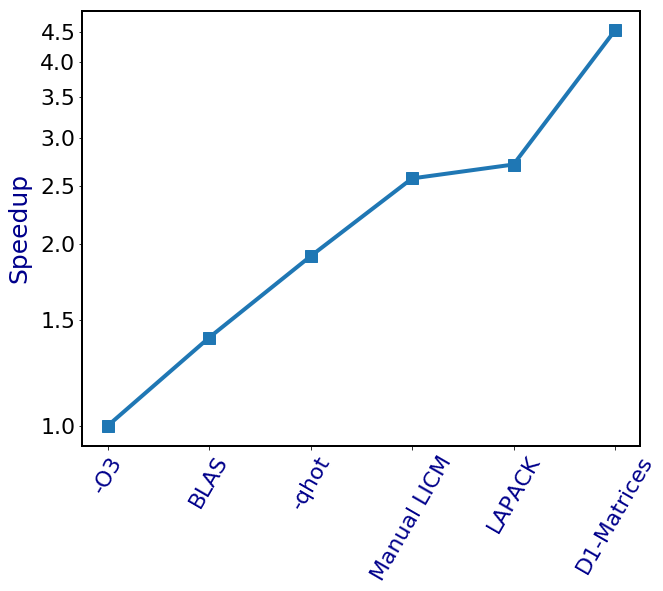

In [11]:
import scipy
import numpy


fig, ax = plt.subplots(figsize=(10, 8)) # set the size that you'd like (width, height)
x = df["OptimizationType"]
y = df["Speedup"]

font = {#'family': 'serif',
        'color':  'darkblue',
        #'weight': 'normal',
        #'size': 16,
        }

plt.yscale('log', basey=2)
plt.yticks([1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5], [1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5], fontsize=22)
plt.xticks(fontsize=22, rotation=60, color='darkblue')

ax.plot(x, y, linewidth=4.0, marker='s', markersize=12.0)
plt.ylabel('Speedup', fontsize=25, labelpad=9, fontdict=font)

TICK_PADDING = -50
xticks = [*ax.xaxis.get_major_ticks(), *ax.xaxis.get_minor_ticks()]
#yticks = [*ax.yaxis.get_major_ticks(), *ax.yaxis.get_minor_ticks()]

for tick in (*xticks):
        tick.set_pad(TICK_PADDING)

# ax.set_xlabel('x')
# ax.set_ylabel('Speedup')
ax.legend(facecolor='white')
plt.show()

In [145]:
fname = "speedup_optimization_version2"
fname_svg = PATH_SVG+fname+".svg"
fname_eps = PATH_EPS+fname+".eps"

#   Salva a figura
if (SAVE_FIG):
    fn = Path(fname_svg).expanduser()
    draw() # necessary to render figure before saving
    fig.savefig(fn, bbox_inches='tight')

    fn = Path(fname_eps).expanduser()
    draw() # necessary to render figure before saving
    fig.savefig(fn, bbox_inches='tight')

<Figure size 864x504 with 0 Axes>